![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [32]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [33]:
penguins_df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [34]:
penguins_df=pd.get_dummies(penguins_df,dtype='int')

In [35]:
model=StandardScaler()
X=model.fit_transform(penguins_df)
penguin_preprocessed=pd.DataFrame(data=X,columns=penguins_df.columns)

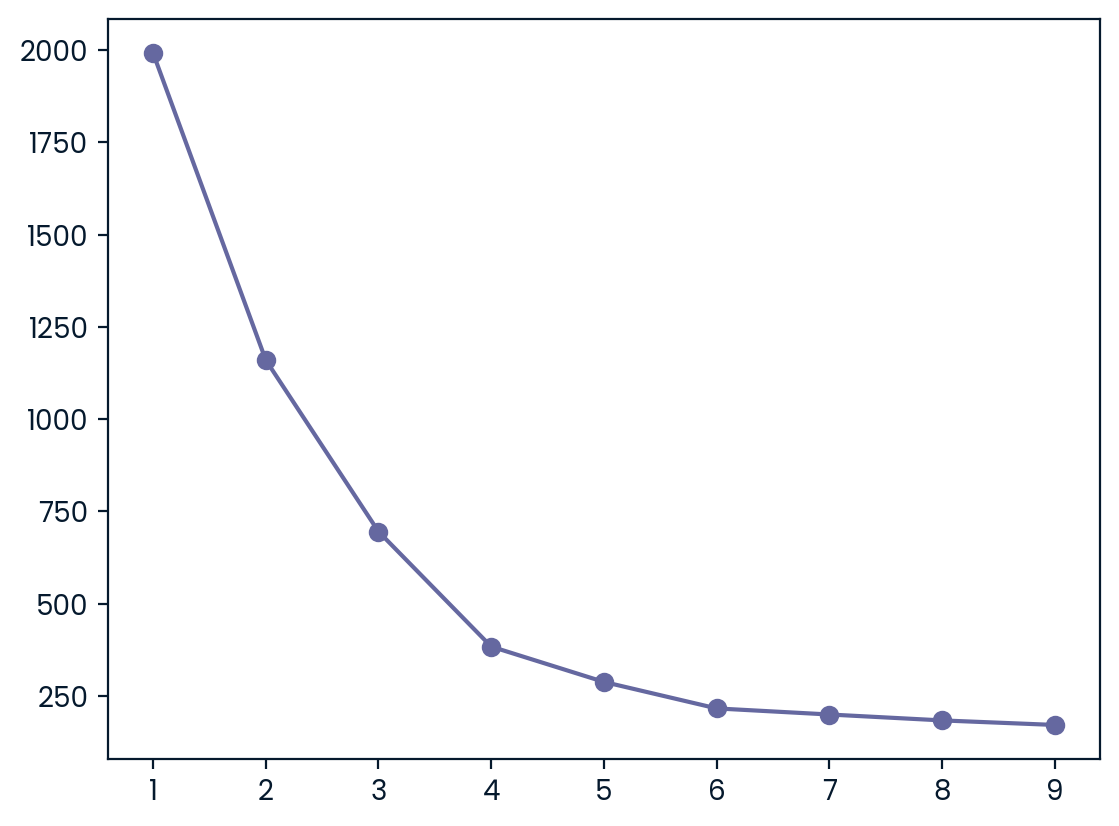

In [36]:
inertia=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i,random_state=41).fit(penguin_preprocessed)
    inertia.append(kmeans.inertia_)
plt.plot(range(1,10),inertia,marker='o')
plt.show()

([<matplotlib.axis.XTick at 0x7f3a73ab8fd0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

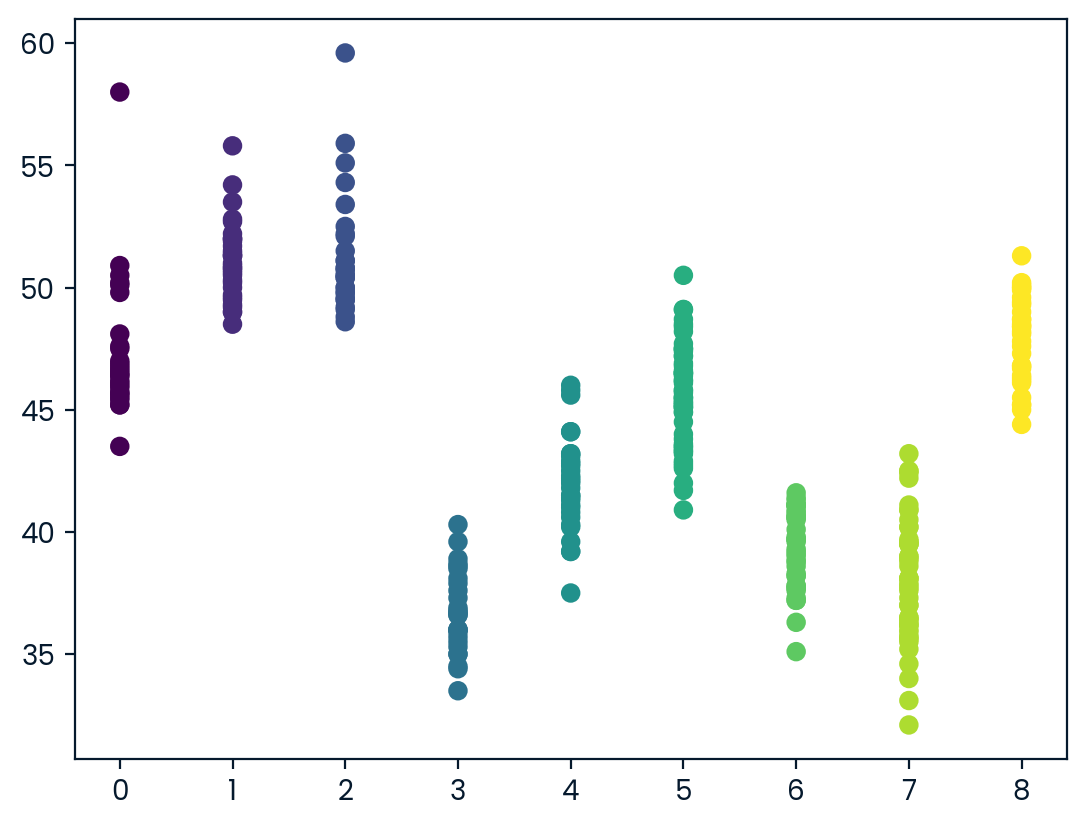

In [37]:
n_clusters=4
kmean=KMeans(n_clusters=4,random_state=41).fit(penguin_preprocessed)
penguins_df['label'] = kmeans.labels_

plt.scatter(penguins_df['label'],penguins_df['culmen_length_mm'],c=kmeans.labels_,cmap='viridis')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))

In [38]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,47.310345,17.706897,192.758621
1,51.094118,19.252941,199.911765
2,51.268966,16.093103,226.000000
3,36.735714,18.442857,190.285714
4,41.987097,19.287097,197.516129
5,45.563793,14.237931,212.706897
6,39.324390,18.860976,188.414634
7,38.054000,17.090000,186.200000
8,47.846875,15.378125,217.500000
